# Overview  🎯

In these exercises, we explore two key concepts in predictive modeling: linear regression and logistic regression. The primary goal is to predict outcomes based on input features, using different approaches to understand and implement these techniques.

- **Exercise 1:** We focus on predicting an individual's `salary `based on their `years of experience` using linear regression. This is done in two ways:
  1. **Direct Application** using scikit-learn’s linear regression library.
  2. **Mathematical Understanding** by manually deriving the linear regression formula and implementing it from scratch.

- **Exercise 2:** We shift to a classification problem where we predict whether an individual’s salary falls into a "High Salary" or "Low Salary" category based on their years of experience. This involves converting the continuous `Salary` variable into a binary variable and applying logistic regression.
-**Exercise 3:** Build a simple neural network to predict `Salary` based on `YearsExperience`.

## Table of Contents

1. [Data Cleaning 🧹](#data-cleaning-)
   - [Handling Missing Values](#handling-missing-values)
   - [Removing Duplicates](#removing-duplicates)
2. [Exploratory Data Analysis (EDA) 🔍](#exploratory-data-analysis-eda-)
   - [Scatter Plot Visualization (Exercise 1)](#scatter-plot-visualization-exercise-1)
   - [Binary Distribution Visualization (Exercise 2)](#binary-distribution-visualization-exercise-2)
3. [Exercise 1: Linear Regression](#exercise-1-linear-regression)
   - [Method 1: Direct Linear Regression Using Scikit-Learn 🛠️](#method-1-direct-linear-regression-using-scikit-learn-)
     - [Splitting the Dataset](#splitting-the-dataset)
     - [Training the Model](#training-the-model)
     - [Evaluating the Model](#evaluating-the-model)
   - [Method 2: Mathematical Approach to Linear Regression 📐](#method-2-mathematical-approach-to-linear-regression-)
     - [Deriving the Linear Regression Equation](#deriving-the-linear-regression-equation)
     - [Implementing the Model from Scratch](#implementing-the-model-from-scratch)
4. [Exercise 2: Logistic Regression](#exercise-2-logistic-regression)
   - [Binary Conversion of Salary](#binary-conversion-of-salary)
   - [Model Training 🚀](#model-training-)
     - [Training the Logistic Regression Model](#training-the-logistic-regression-model)
   - [Model Evaluation 📈](#model-evaluation-)
     - [Evaluating Accuracy, Precision, Recall, and F1 Score](#evaluating-accuracy-precision-recall-and-f1-score)
   - [Visualizing Model Predictions and Decision Boundary 🖼️](#visualizing-model-predictions-and-decision-boundary-)
     - [Plotting Predictions](#plotting-predictions)
     - [Plotting the Decision Boundary](#plotting-the-decision-boundary)
5. [Exercise 3: Neural Networks](#exercise-3-Neural Networks)


## 1. Data Cleaning 

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
path=r"C:\Users\hey\OneDrive\Bureau\Masterclass\Salary_Data.csv"
df=pd.read_csv(path)

In [24]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [25]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [27]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [28]:
df.duplicated().sum()

0

In [29]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

## 2.Exploratory Data Analysis (EDA)

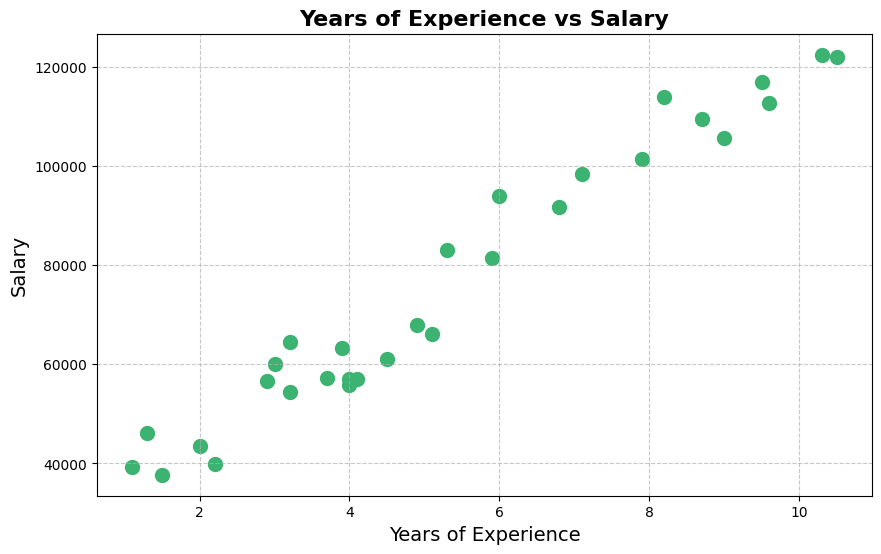

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df['YearsExperience'], y=df['Salary'], color='#3CB371', s=100)  
plt.xlabel('Years of Experience', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.title('Years of Experience vs Salary', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Interpretation of Scatter Plot: Years of Experience vs Salary

The scatter plot shows that as `Years of Experience` increases, `Salary` also tends to go up. The points form a straight line, which means there's a clear, predictable relationship between experience and salary. This suggests that using a linear regression model could be a good way to predict someone's salary based on how many years they've worked.

In short, more experience usually means a higher salary, and this relationship is straightforward.


In [31]:
df.var()

YearsExperience    8.053609e+00
Salary             7.515510e+08
dtype: float64

## 3.Direct Linear Regression Using Scikit-Learn

i use docs from https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [32]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

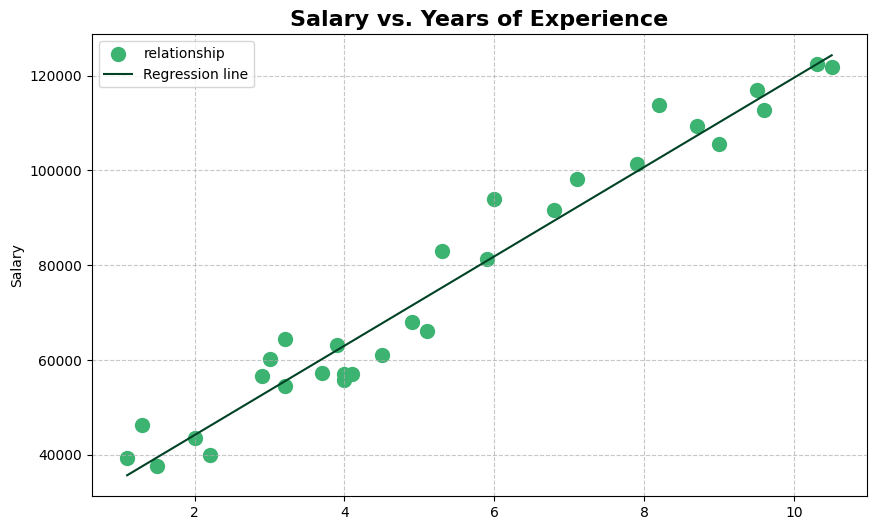

R-squared = 0.9024461774180497
Mean Squared Error =49830096.85590839


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#input:year_exp , output:salary 
x=df[['YearsExperience']]
y=df[['Salary']]

#split our data to train and test 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#import model:
reg=LinearRegression()

#fit model:
reg.fit(x_train,y_train)

#predict:
predction=reg.predict(x_test)

#plot model and scatter 
plt.figure(figsize=(10, 6))
plt.scatter(x=df['YearsExperience'], y=df['Salary'], color='#3CB371', s=100,label='relationship')  
plt.plot(df['YearsExperience'], reg.predict(df[['YearsExperience']]), color='#004225',label='Regression line')
plt.ylabel('Salary')
plt.title('Salary vs. Years of Experience', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


#R-squared:
Rsq=reg.score(x_test,y_test)
print(f"R-squared = {Rsq}")

#MSE:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predction)
print(f"Mean Squared Error ={mse}")


## 4. Mathematical Approach to Linear Regression

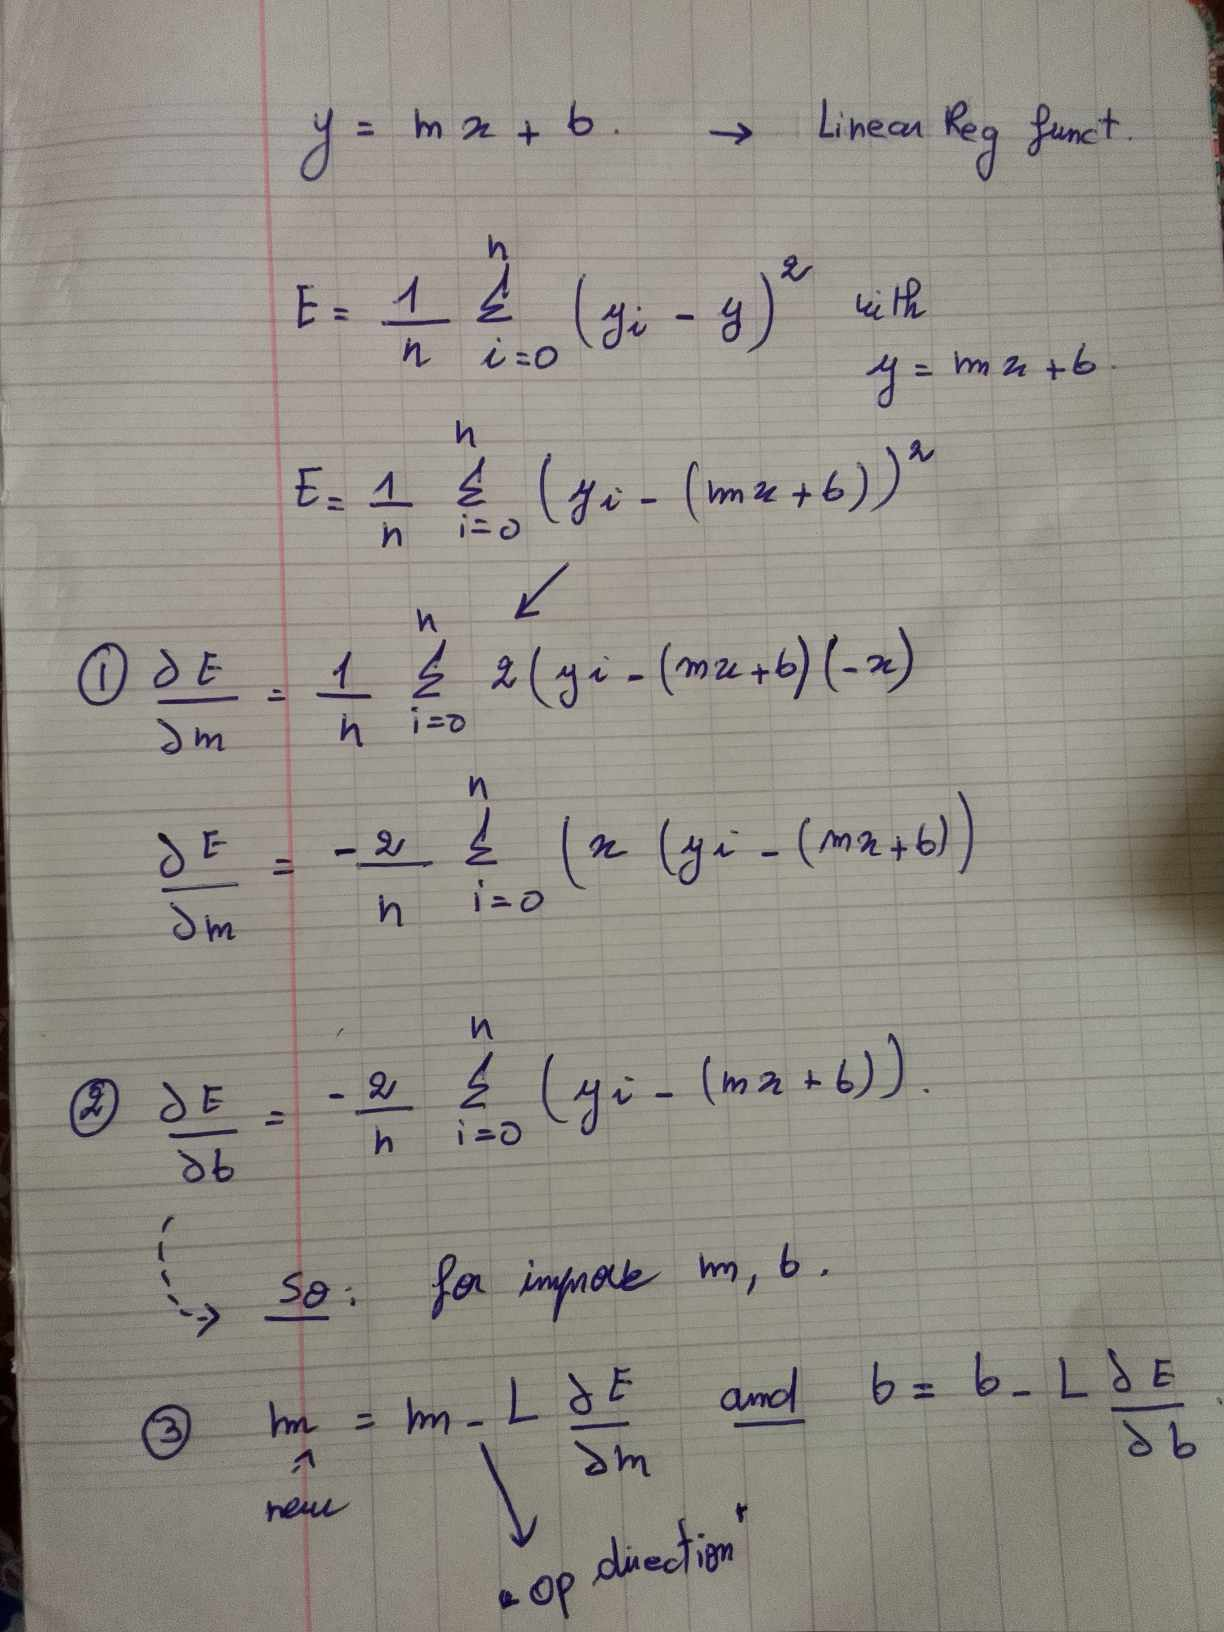

11767.64687290499 10173.93915744863


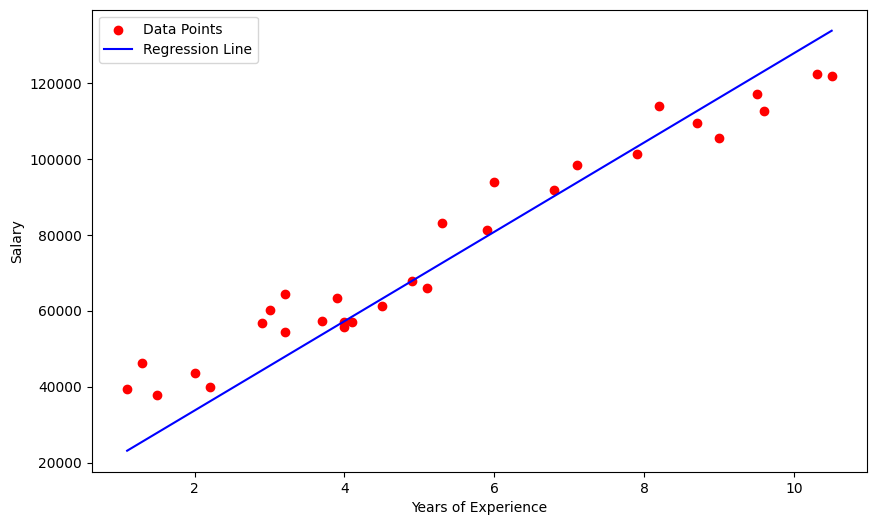

In [34]:

# Initialize parameters
m = 0  
b = 0  
L = 0.01  
epochs = 100

# gradient descent function
def gradient_descent(m_now, b_now, df, L):
    m_gradient = 0
    b_gradient = 0
    n = len(df)

    for i in range(n):
        x = df.iloc[i].YearsExperience
        y = df.iloc[i].Salary
        
        # Calculate the gradients for m and b
        m_gradient += -(2/n) * x * (y - (m_now * x + b_now))
        b_gradient += -(2/n) * (y - (m_now * x + b_now))

    # Update m and b using the learning rate
    m = m_now - m_gradient * L
    b = b_now - b_gradient * L
    
    return m, b

# Perform gradient descent
for _ in range(epochs):
    m, b = gradient_descent(m, b, df, L)

print(m,b)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df.YearsExperience, df.Salary, color='red', label='Data Points')
x_values = df.YearsExperience
y_values = m * x_values + b
plt.plot(x_values, y_values, color='blue', label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()


## exo02

In [35]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [36]:
# Create  highsalary
df['HighSalary'] = (df['Salary'] > 70000).astype(int)
df.sample(5)

,YearsExperience,Salary,HighSalary
11,4.0,55794,0
0,1.1,39343,0
21,7.1,98273,1
25,9.0,105582,1
10,3.9,63218,0


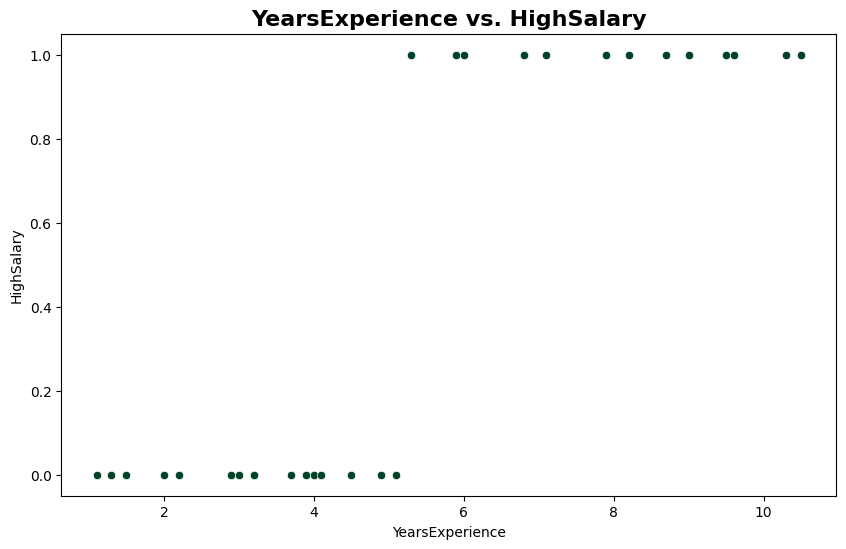

In [37]:
# Plotting YearsExperience vs HighSalary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearsExperience', y='HighSalary',color='#004225', data=df)
plt.title('YearsExperience vs. HighSalary', fontsize=16, fontweight='bold')
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split data 
X = df[['YearsExperience']]  # input
y = df['HighSalary']         # output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training 
model = LogisticRegression() #int model
model.fit(X_train, y_train)


LogisticRegression()

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions
y_pred = model.predict(X_test)

# evulation 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Accuracy: 0.83
Precision: 1.00
Recall: 0.67
F1 Score: 0.80


c:\Users\hey\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


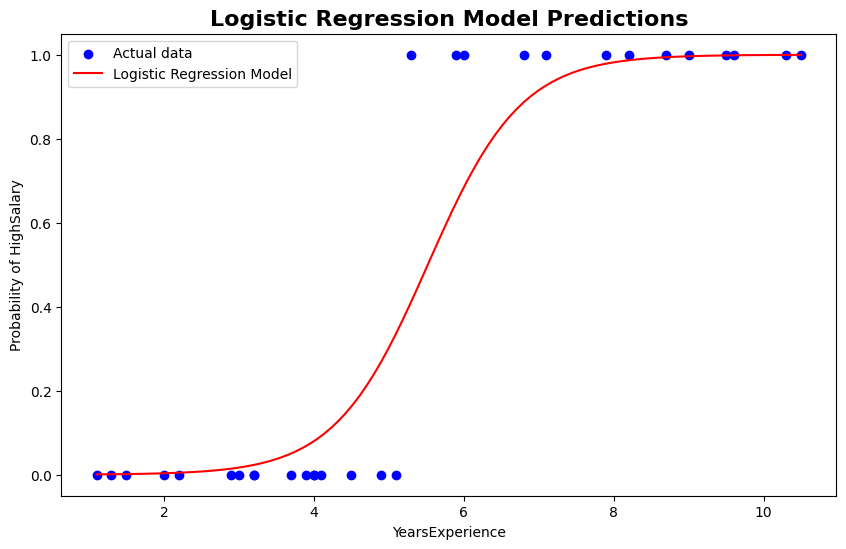

In [40]:
#visulation model:

#i'll visualize model predictions against the actual data points.
import numpy as np

#range of values for YearsExperience
X_range = np.linspace(df['YearsExperience'].min(), df['YearsExperience'].max(), 100).reshape(-1, 1)

# Predict the probability
y_prob = model.predict_proba(X_range)[:, 1]  # Prob of class 1 (HighSalary)

plt.figure(figsize=(10, 6))
plt.scatter(df['YearsExperience'], df['HighSalary'], color='blue', label='Actual data')
plt.plot(X_range, y_prob, color='red', label='Logistic Regression Model')

plt.xlabel('YearsExperience')
plt.ylabel('Probability of HighSalary')
plt.title('Logistic Regression Model Predictions',fontsize=16, fontweight='bold')
plt.legend()
plt.show()


## exo 03

In [41]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [42]:
# Normalizing the data
scaler = MinMaxScaler()
df[['YearsExperience', 'Salary']] = scaler.fit_transform(df[['YearsExperience', 'Salary']])

In [43]:
# Splitting the data
X = df['YearsExperience'].values.reshape(-1, 1)
y = df['Salary'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
# Step 2: Model Design
model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu'))  # 1 input feature, 10 neurons in hidden layer
model.add(Dense(5, activation='relu'))  # Second hidden layer with 5 neurons
model.add(Dense(1))  # Output layer

c:\Users\hey\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
# Step 3: Model Training
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)


In [46]:
# Step 4: Evaluation
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# MSE and R-squared for training data
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# MSE and R-squared for testing data
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Training MSE: {mse_train:.4f}, R-squared: {r2_train:.4f}")
print(f"Testing MSE: {mse_test:.4f}, R-squared: {r2_test:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Training MSE: 0.0346, R-squared: 0.6756
Testing MSE: 0.0370, R-squared: 0.4812


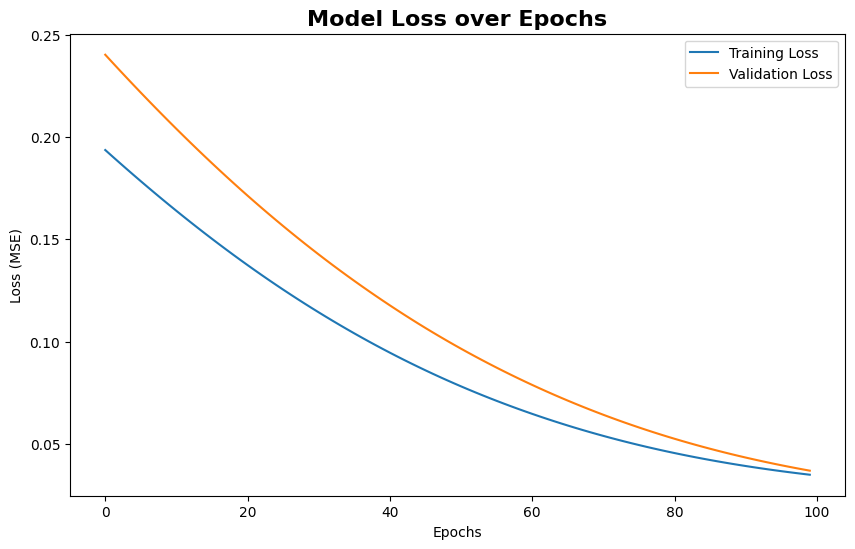

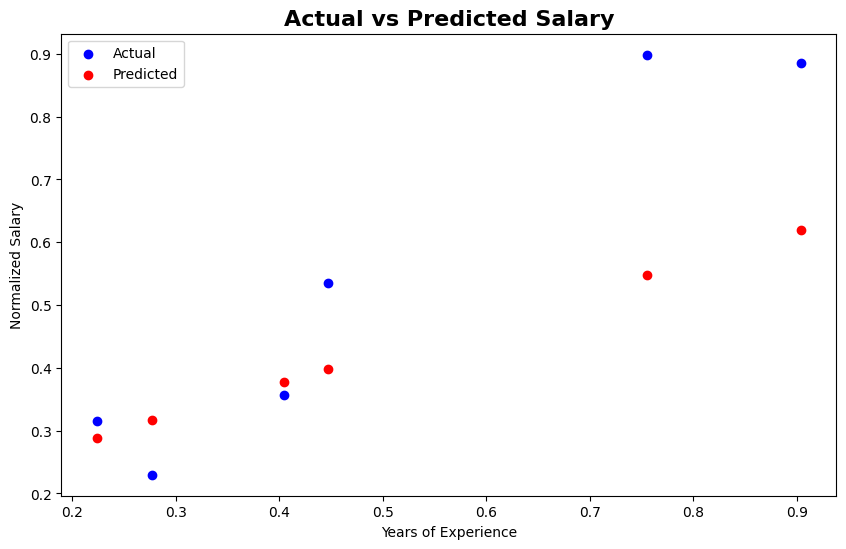

In [48]:
# Plotting the loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs',fontsize=16, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

# Visualizing predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred_test, color='red', label='Predicted')
plt.title('Actual vs Predicted Salary',fontsize=16, fontweight='bold')
plt.xlabel('Years of Experience')
plt.ylabel('Normalized Salary')
plt.legend()
plt.show()